<a href="https://colab.research.google.com/github/hanbitgoun/GJ_AI/blob/main/deep_learning/0707_d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 연쇄법칙

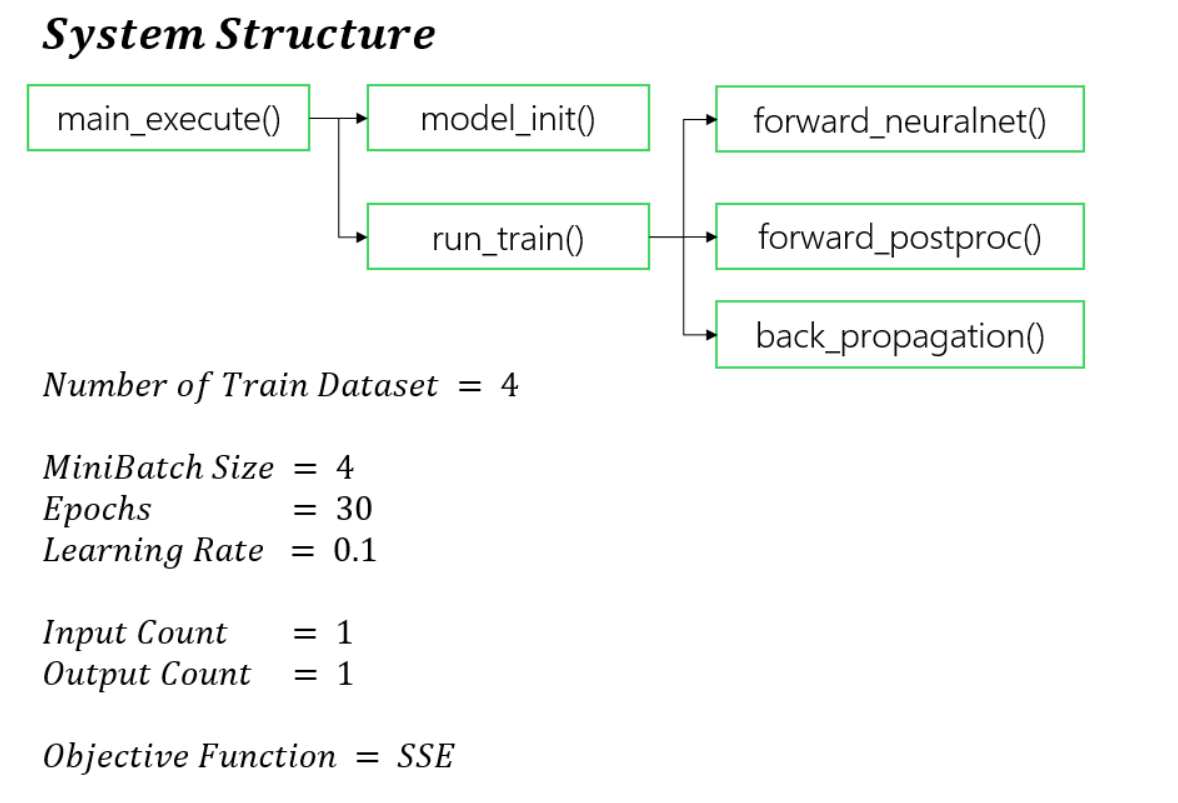

In [ ]:
import numpy as np

x = np.asarray( [580, 700, 810, 840] )
y_label_total = np.asarray( [374, 385, 375, 401] )

input_cnt = 1
output_cnt = 1

RND_STD = 1
RND_MEAN = 0

def main_execute(x,y,epoch_count,report,lr=0.001):
    model_init()
    sse_row, theta_0_row, theta_1_row = run_train(x,y,epoch_count,report,lr)

    return sse_row, theta_0_row, theta_1_row

def model_init():
  global theta_0, theta_1
  theta_0 = np.random.normal(RND_MEAN, RND_STD, size=[ output_cnt ])
  theta_1 = np.random.normal(RND_MEAN, RND_STD, size=[ input_cnt, output_cnt])

def run_train(x,y,epoch_count,report,lr):
  print("Initial theta_0 {}".format(theta_0))
  print("Initial theta_1 {}".format(theta_1))
  sse_row = []
  theta_0_row = []
  theta_1_row = []

  for epoch in range(epoch_count):
    y_hat = forward_nueralnet(x)
    sse = forward_postproc(y_hat, y_label_total)
    sse_row.append(sse)

    back_propagation(y_hat, lr)

    theta_0_row.append(theta_0)
    theta_1_row.append(theta_1)

    if report > 0 and epoch % report == 0:
      print("Epoch - {}".format(epoch+1))
      print("SSE - {}".format(sse))

  print("==========================")
  print('Fianl SSE : {}'.format(sse))

  return sse_row, theta_0_row, theta_1_row

# y_hat
def forward_nueralnet(input_x):
  y_hat = theta_0 + theta_1 * input_x
  
  return y_hat

# sse
def forward_postproc(output, y):
  diff = output - y
  square = np.square(diff)
  sse = np.sum(square) * 1/2

  return sse

def back_propagation(y_hat, lr):
  global theta_0, theta_1
  theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
  theta_1 = theta_1 - lr * (np.sum(y_hat - y_label_total) * x) 

sse_row, theta_0_row, theta_1_row = main_execute(x = x, 
                                                 y = y_label_total, 
                                                 epoch_count = 15, 
                                                 report = 3, 
                                                 lr = 0.0000001)

Initial theta_0 [0.46268836]
Initial theta_1 [[-1.03748703]]
Epoch - 1
SSE - 2639518.2743298337
Epoch - 4
SSE - 598607.5975058852
Epoch - 7
SSE - 165181.579904355
Epoch - 10
SSE - 81173.98064539743
Epoch - 13
SSE - 68992.52365095362
Fianl SSE : 68995.77485135855


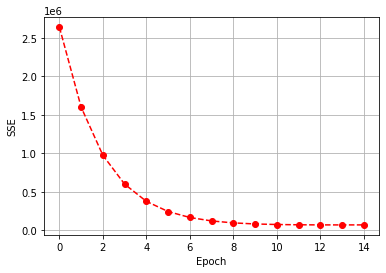

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sse_row, '--o',color='red')
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.grid()
plt.show()